# Using Bootstrapping to Calculate p-values

In this notebook, we explore how to use bootstrapping to calculate p-values, a fundamental concept in statistical hypothesis testing. We'll focus on using Python to implement the procedure step by step, complemented with visualizations and examples to make the learning process engaging and intuitive.

## Hypothesis Testing with Bootstrapping

Consider a scenario where we administer a drug to eight patients. Our goal is to determine whether the drug's effect is statistically significant or merely a result of random variation.

### Steps in Hypothesis Testing with Bootstrapping:
1. **Shift the data**: Adjust the data so the null hypothesis mean is zero.
2. **Generate bootstrap samples**: Create new datasets by sampling with replacement.
3. **Calculate the statistic**: Compute the mean for each bootstrap sample.
4. **Visualize the results**: Examine the distribution of bootstrap means.
5. **Calculate the p-value**: Determine the probability of observing a result as extreme as the observed mean under the null hypothesis.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data representing patient responses
data = np.random.normal(0.5, 1, 8)  # Original data with mean ~0.5
print('Generated Data:', data)

Generated Data: [0.99671415 0.3617357  1.14768854 2.02302986 0.26584663 0.26586304
 2.07921282 1.26743473]


### Step 1: Shift the Data

To test the null hypothesis, we shift the data so that its mean is zero. This allows us to simulate the scenario where the drug has no effect.

Shifted Data: [-0.05422653 -0.68920498  0.09674786  0.97208917 -0.78509406 -0.78507764
  1.02827213  0.21649405]


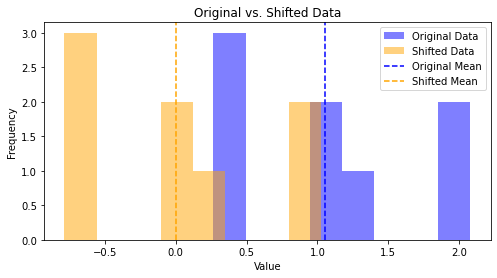

In [2]:
# Step 1: Shift the data to have a mean of 0
shifted_data = data - np.mean(data)
print('Shifted Data:', shifted_data)

# Visualize the original and shifted data
plt.figure(figsize=(8, 4))
plt.hist(data, bins=8, alpha=0.5, label='Original Data', color='blue')
plt.hist(shifted_data, bins=8, alpha=0.5, label='Shifted Data', color='orange')
plt.axvline(np.mean(data), color='blue', linestyle='--', label='Original Mean')
plt.axvline(0, color='orange', linestyle='--', label='Shifted Mean')
plt.title('Original vs. Shifted Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Step 2: Generate Bootstrap Samples

We create multiple bootstrap samples by sampling with replacement from the shifted data.

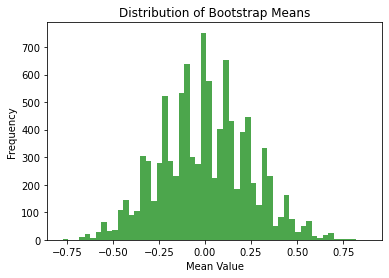

In [3]:
# Step 2: Generate bootstrap samples and calculate means
bootstrap_means = np.empty(10000)
for i in range(10000):
    bootstrap_sample = np.random.choice(shifted_data, len(shifted_data), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Visualize the distribution of bootstrap means
plt.hist(bootstrap_means, bins='auto', color='green', alpha=0.7)
plt.title('Distribution of Bootstrap Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

### Step 5: Calculate the p-value

The p-value represents the probability of observing a result as extreme as the observed mean under the null hypothesis. We calculate it by comparing the observed mean to the bootstrap distribution.

In [4]:
# Step 5: Calculate the p-value
observed_mean = 0.5  # The observed mean of the original data
p_value = ((np.sum(bootstrap_means >= observed_mean) + np.sum(bootstrap_means <= -observed_mean))
          / len(bootstrap_means))
print('Calculated p-value:', p_value)

Calculated p-value: 0.038


## Conclusion

Bootstrapping is a powerful technique that allows us to perform hypothesis testing without relying on strict assumptions about the data distribution. By resampling and visualizing the results, we gain a deeper understanding of statistical significance.